In [5]:
import logging
logger = logging.getLogger()
logging.ERROR = logger

import math
import numpy as np
import pandas as pd

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [38]:
def layer_sizes(X,Y):
    n_x = X.shape[1]
    n_h = 10
    n_y=Y.shape[1]
    return n_x,n_h,n_y

In [108]:
x = np.arange(0,100) * np.random.choice([-1,1],size=100)

In [113]:
y = np.array([1 if i >=0 else 0 for i in x])

In [119]:
x = x.reshape(x.shape + (1,))

In [120]:
y = y.reshape(y.shape + (1,))

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import seaborn as sns
sns.set_style("whitegrid")

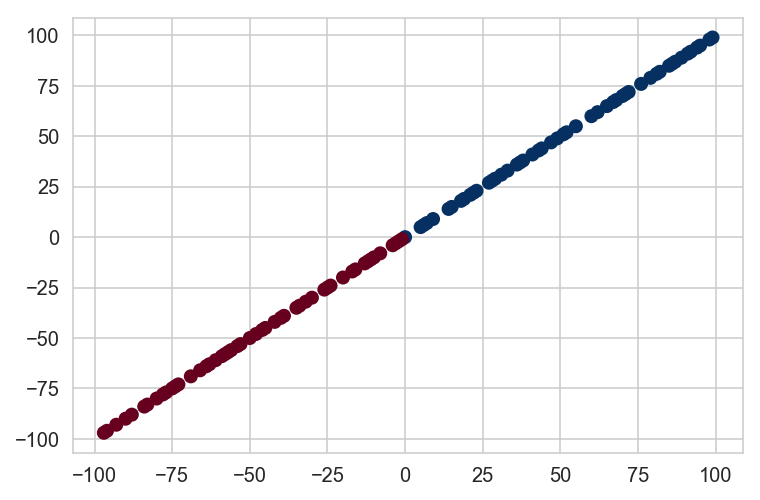

In [127]:
plt.scatter(x,x,c=y,cmap="RdBu")

In [128]:
def initialize_parameter(n_x,n_h,n_y):
    np.random.seed=2
    w1 = np.random.randn(n_x,n_h)*0.01
    b1 = np.zeros(shape=(1,n_h))
    w2 = np.random.randn(n_h,n_y)*0.01
    b2 = np.zeros(shape=(1,n_y))
    parameters = {
        'W1': w1,
        'b1': b1,
        'W2': w2,
        'b2': b2
    }
    return parameters

In [131]:
parameters = initialize_parameter(1,10,1)

In [132]:
print(parameters["W1"].shape)
print(parameters["b1"].shape)
print(parameters["W2"].shape)
print(parameters["b2"].shape)

(1, 10)
(1, 10)
(10, 1)
(1, 1)


In [133]:
def forward_propagation(X, parameters) :
    w1 = parameters['W1']
    b1 = parameters['b1']
    w2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(X,w1)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, w2)+b2
    A2 = sigmoids(Z2)
    
    cache = {
        'Z1' : Z1,
        'A1' : A1,
        'Z2' : Z2,
        'A2' : A2
    }
    return (A2,cache)

In [134]:
A2, cache = forward_propagation(x, parameters)

In [147]:
A1 = cache["A1"]
Z1 = cache["Z1"]
Z2 = cache["Z2"]

In [139]:
def cost_compute(A2,Y,parameters) :
    m = Y.shape[0]
    logprob = np.multiply( np.log( A2 ) , Y ) + np.multiply( (1 - Y ) , np.log( 1 - A2 ))
    cost = -1/m *np.sum(logprob)
    cost = np.squeeze(cost)
    return cost

In [194]:
def backward_propagation(X,Y,parameters,cache) :
    m = Y.shape[0]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A2 = cache['A2']
    A1 = cache['A1']
    
    dz2 = A2 - y
    dw2 = 1/m * np.dot(A1.T,(A2 - y))
    db2 = 1/m * np.sum(dz2,axis=0,keepdims=True)
    dz1 = 1/m * np.multiply(np.dot(dz2, parameters["W2"].T), (1-np.power(A1,2)))
    dw1 = 1/m * np.dot(x.T,dz1)
    db1 = 1/m * np.sum(dz1,axis=0,keepdims=True)
    
    grads = {
        'dW1' : dw1,
        'dW2' : dw2,
        'db1' : db1,
        'db2' : db2
    }
        
    return grads

In [196]:
grads = backward_propagation(x, y, parameters, cache)

In [198]:
def update_models(parameters,grads,learning_rate=0.01):
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    dW2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']
    
    W1 = W1 - dW1*learning_rate
    W2 = W2 - dW2*learning_rate
    b1 = b1 - db1*learning_rate
    b2 = b2 - db2*learning_rate
    
    parameters = {
        'W1' : W1,
        'W2' : W2,
        'b1' : b1,
        'b2' : b2
    }
        
    return parameters

In [ ]:
def nn_model(X,Y,n_h,num_iterations=10001,print_cost=False):
    
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    parameters = initialize_parameter(n_x,n_h,n_y)
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    for i in range(0,num_iterations) : 
        A2,cache = forward_propagation(X,parameters)
        cost = cost_compute(A2,Y,parameters)
        grads = backward_propagation(X,Y,parameters,cache)
        parameters = update_models(parameters,grads)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [ ]:
def predict(parameters,X):
    A2,cache = forward_propagation(X,parameters)
    prediction = A2>0.5
    return prediction

In [ ]:
df = pd.read_csv("train.csv")#titanic's kaggle data set (train.csv) . 

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
X = df.drop("Name",axis=1)
X = X.drop("Ticket",axis=1)
X = X.drop("Survived",axis=1)
X = X.drop("Cabin",axis=1)
X = X.drop("Embarked",axis=1)
X = X.fillna(np.mean(X))
X = X.drop("Sex",axis=1)
Y = pd.DataFrame(df["Survived"])
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2)
X_train=X_train.T
X_test=X_test.T
Y_train=Y_train.values.reshape(1,Y_train.shape[0])
Y_test=Y_test.values.reshape(1,Y_test.shape[0])

In [ ]:
print(Y_train.shape)
parameters = nn_model(X_train, Y_train, n_h = 10, num_iterations = 10001, print_cost=True)

In [ ]:
pred = predict(parameters,X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred`)

In [ ]:
Y.values.reshape(-1,1).shape

In [ ]:

print(type([1.02,1.03,2.25]))

In [ ]:
X.shape[0]

In [ ]:
df = pd.read_csv("train_FD001.txt",sep=" ",low_memory=False, header=None)
# df = df.drop(27,axis=1)
# df = df.drop(26,axis=1)
# df.columns = ["unit number","time, in cycles","operational setting 1","operational setting 2","operational setting 3","sensor measurement 1","sensor measurement 2","sensor measurement 3","sensor measurement 4","sensor measurement 5","sensor measurement 6","sensor measurement 7","sensor measurement 8","sensor measurement 9","sensor measurement 10","sensor measurement 11","sensor measurement 12","sensor measurement 13","sensor measurement 14","sensor measurement 15","sensor measurement 16","sensor measurement 17","sensor measurement 18","sensor measurement 19","sensor measurement 20","sensor measurement 21"]

In [ ]:
from IPython.display import display
np.set_printoptions(precision=2)
with pd.option_context("display.max_rows",5,"display.max_columns",1000):
    display(df.head(3))

In [ ]:
mask = df.isna().sum().sort_index()/len(df) < 0.8

In [ ]:
df = df.loc[:,mask]

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.0000001)
sel.fit(df/df.mean())

In [ ]:
mask = sel.get_support()

In [ ]:
reduced_df = df.loc[:,mask]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = reduced_df.corr(method="pearson")
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = plt.cm.Blues
sns.heatmap(corr,mask=mask,cmap=cmap,annot=True,center=0,linewidths=1,fmt=".1f")

In [ ]:
reduced_df.head()

In [ ]:
df = pd.read_csv("train_FD001.txt",sep=" ",low_memory=False, header=None)
df = df.drop(27,axis=1)
df = df.drop(26,axis=1)
df.columns = ["unit number","time, in cycles","operational setting 1","operational setting 2","operational setting 3","sensor measurement 1","sensor measurement 2","sensor measurement 3","sensor measurement 4","sensor measurement 5","sensor measurement 6","sensor measurement 7","sensor measurement 8","sensor measurement 9","sensor measurement 10","sensor measurement 11","sensor measurement 12","sensor measurement 13","sensor measurement 14","sensor measurement 15","sensor measurement 16","sensor measurement 17","sensor measurement 18","sensor measurement 19","sensor measurement 20","sensor measurement 21"]

In [ ]:
#df["operational setting 3"].nunique()
df=df.drop("operational setting 3",axis=1)

In [ ]:
#df["sensor measurement 1"].nunique()
df=df.drop("sensor measurement 1",axis=1)

In [ ]:
#df["sensor measurement 5"].nunique()
df=df.drop("sensor measurement 5",axis=1)

In [ ]:
#df["sensor measurement 16"].nunique()
df=df.drop("sensor measurement 16",axis=1)

In [ ]:
#df["sensor measurement 18"].nunique()
df=df.drop("sensor measurement 18",axis=1)

In [ ]:
#df["sensor measurement 19"].nunique()
df=df.drop("sensor measurement 19",axis=1)
df=df.drop("sensor measurement 6",axis=1)
df=df.drop("sensor measurement 10",axis=1)

In [ ]:
df.head()

In [ ]:
unit1 = df.groupby("unit number")

In [ ]:
unit1.describe().T

In [ ]:
df.groupby('unit number').corr()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot('operational setting 1','sensor measurement 2',data=df,alpha=.2)

In [ ]:
df1 = pd.read_csv("Desktop/RUL_FD001.txt",sep=" ",header=None)
df1=df1.drop(1,axis=1)
df1.columns = ['Y_label']
df1.head()

In [ ]:
df1.shape
#df1['Y_label'].value_counts()

In [ ]:
df['unit number'].max()

In [ ]:
df[df['unit number']==1]

In [ ]:
plt.plot(df['operational setting 1'],df['sensor measurement 2'],'-',alpha=0.2)

In [ ]:
subset = df[['operational setting 1','operational setting 2']]
#subset1 = df['operational setting 2']
#subset2 = pd.concat(subset,subset1)
subset.head()

In [ ]:
import seaborn as sns
corr = df.corr(method="pearson")
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = plt.cm.Blues
sns.heatmap(corr,mask=mask,cmap=cmap,annot=True,center=0,linewidths=1,fmt=".1f")

In [ ]:
unit1=df[df['unit number']==1]
unit1.head()

In [ ]:
sns.jointplot('time, in cycles','sensor measurement 9',data=unit1)

In [ ]:
df['operational setting 1'].max()

In [ ]:
sns.pairplot(unit1)

In [ ]:
sensors=df['sensor measurement 2']
g = sns.PairGrid(data=df[df['unit number']==1] ,
                 x_vars='time, in cycles',
                 y_vars=sensors,
                 hue="unit number", size=3, aspect=2.5)
g = g.map(plt.scatter, alpha=0.5)
g = g.set(xlim=(300,0))
g = g.add_legend()

In [ ]:
df.corr()